In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/can-i-get-promoted/test_data (1).csv
/kaggle/input/can-i-get-promoted/train_data.csv


In [3]:
df=pd.read_csv("/kaggle/input/can-i-get-promoted/train_data.csv")
display(df.head())

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,190767,Operations,region_27,Bachelor's,m,sourcing,1,47,1.0,6,1,0,55,0
1,10520,Sales & Marketing,region_31,Bachelor's,m,other,1,38,3.0,9,0,0,54,0
2,103549,Technology,region_27,Master's & above,m,sourcing,1,37,3.0,3,1,0,76,0
3,108438,Sales & Marketing,region_10,Bachelor's,m,sourcing,1,30,4.0,4,0,0,41,0
4,51805,Procurement,region_22,Bachelor's,m,sourcing,1,35,3.0,10,0,0,68,0


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155846 entries, 0 to 155845
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   employee_id           155846 non-null  int64  
 1   department            155846 non-null  object 
 2   region                155846 non-null  object 
 3   education             150516 non-null  object 
 4   gender                155846 non-null  object 
 5   recruitment_channel   155846 non-null  object 
 6   no_of_trainings       155846 non-null  int64  
 7   age                   155846 non-null  int64  
 8   previous_year_rating  142491 non-null  float64
 9   length_of_service     155846 non-null  int64  
 10  KPIs_met >80%         155846 non-null  int64  
 11  awards_won?           155846 non-null  int64  
 12  avg_training_score    155846 non-null  int64  
 13  is_promoted           155846 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 16.

In [6]:
print(df.describe())

         employee_id  no_of_trainings            age  previous_year_rating  \
count  155846.000000    155846.000000  155846.000000         142491.000000   
mean    97459.440563         1.309498      34.627016              3.290032   
std     56252.560738         0.545987       7.666873              1.207803   
min         1.000000         1.000000      20.000000              1.000000   
25%     48739.250000         1.000000      29.000000              3.000000   
50%     97491.500000         1.000000      33.000000              3.000000   
75%    146190.750000         2.000000      39.000000              4.000000   
max    194808.000000        10.000000      60.000000              5.000000   

       length_of_service  KPIs_met >80%    awards_won?  avg_training_score  \
count      155846.000000  155846.000000  155846.000000       155846.000000   
mean            5.884033       0.408782       0.025127           63.609506   
std             4.060386       0.491610       0.156512         

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

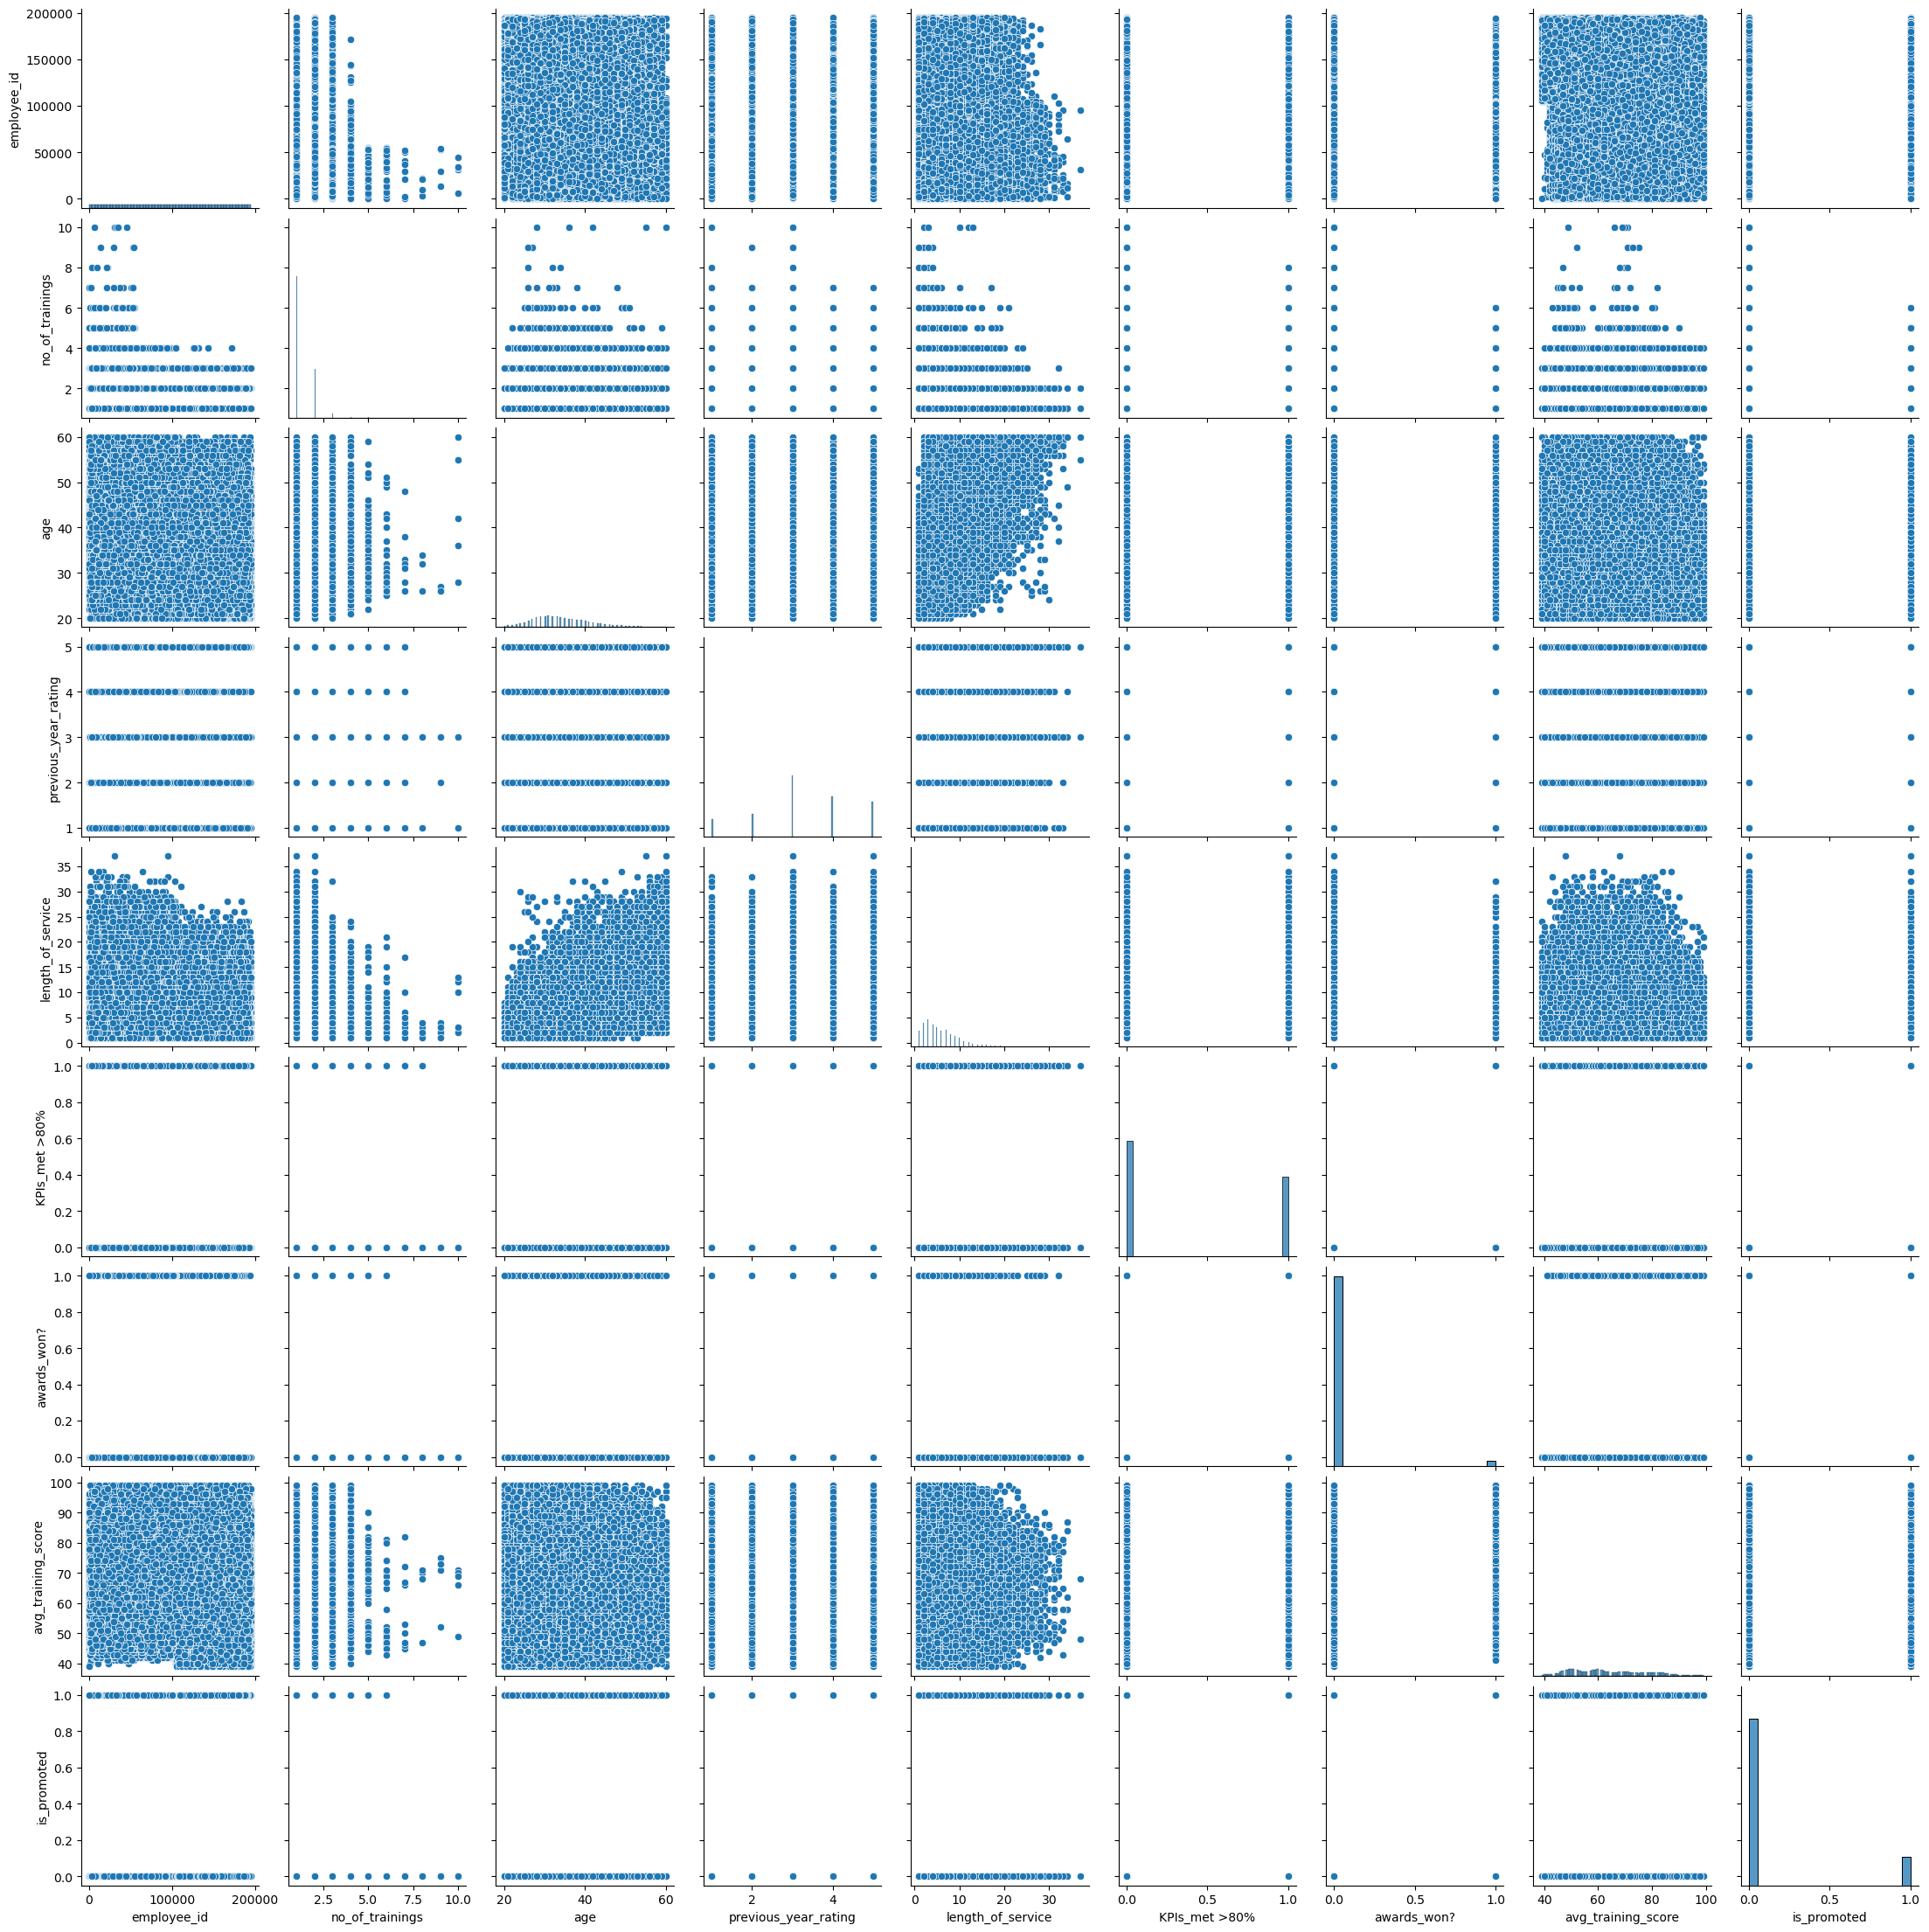

In [8]:
sns.pairplot(df)
plt.show()

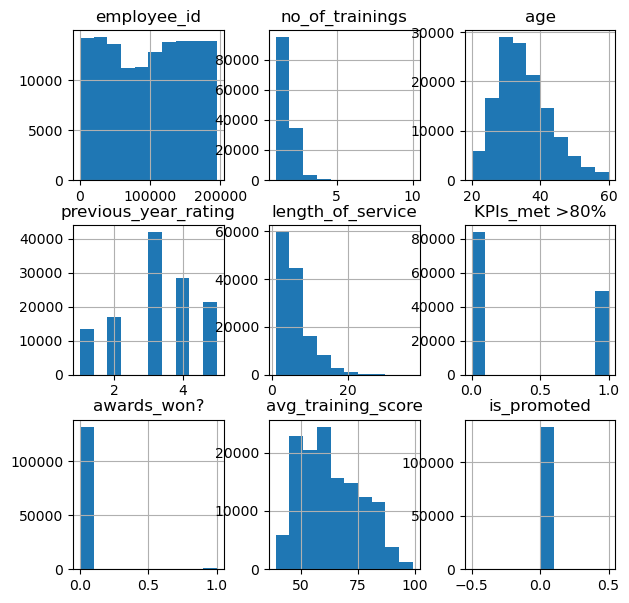

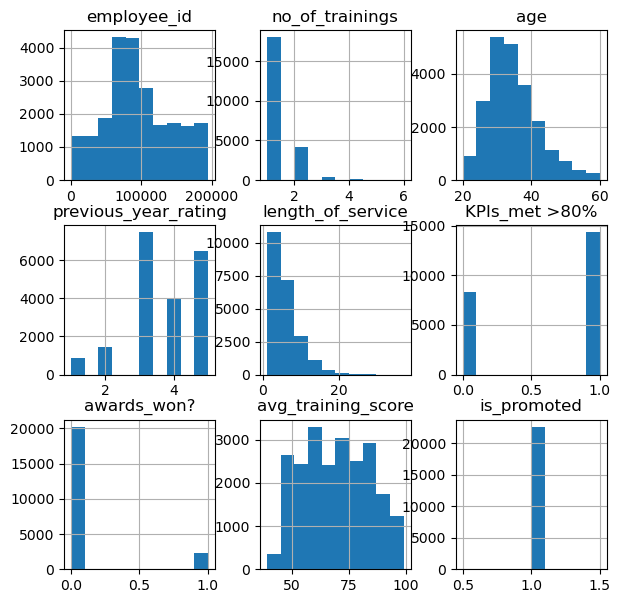

In [9]:
df.groupby('is_promoted').hist(figsize=(7,7))
plt.show()

In [10]:
df.isnull().any()

employee_id             False
department              False
region                  False
education                True
gender                  False
recruitment_channel     False
no_of_trainings         False
age                     False
previous_year_rating     True
length_of_service       False
KPIs_met >80%           False
awards_won?             False
avg_training_score      False
is_promoted             False
dtype: bool

In [12]:
df['education'].value_counts()

Bachelor's          109239
Master's & above     38647
Below Secondary       2630
Name: education, dtype: int64

In [15]:
df['education'].fillna(df['education'].value_counts().index[0],inplace=True)

In [17]:
df['previous_year_rating'] = df['previous_year_rating'].fillna(df['previous_year_rating'].mean())

In [19]:
df.drop(['employee_id'],axis=1,inplace=True)

In [21]:
categorical_features = list(df.select_dtypes(include='object').columns)

In [22]:
from sklearn.preprocessing import LabelEncoder
Label_Encoder = LabelEncoder()
for i in df.select_dtypes(include='object').columns:
    df[i] = Label_Encoder.fit_transform(df[i].astype(str))

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155846 entries, 0 to 155845
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   department            155846 non-null  int64  
 1   region                155846 non-null  int64  
 2   education             155846 non-null  int64  
 3   gender                155846 non-null  int64  
 4   recruitment_channel   155846 non-null  int64  
 5   no_of_trainings       155846 non-null  int64  
 6   age                   155846 non-null  int64  
 7   previous_year_rating  155846 non-null  float64
 8   length_of_service     155846 non-null  int64  
 9   KPIs_met >80%         155846 non-null  int64  
 10  awards_won?           155846 non-null  int64  
 11  avg_training_score    155846 non-null  int64  
 12  is_promoted           155846 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 15.5 MB


In [25]:
x = df.drop(['is_promoted'],axis=1).values
y = df['is_promoted'].values

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=0) 
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(109092, 12)
(109092,)
(46754, 12)
(46754,)


In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
models = []
models.append(('KNN',KNeighborsClassifier()))
models.append(('LR',LogisticRegression()))
models.append(('DT',DecisionTreeClassifier()))
models.append(('RF',RandomForestClassifier()))
models.append(('GNB',GaussianNB()))

In [30]:
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
names = []
scores = []
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
model_report = pd.DataFrame({'Name': names, 'Score': scores})
print(model_report)

  Name     Score
0  KNN  0.848740
1   LR  0.863434
2   DT  0.772811
3   RF  0.861937
4  GNB  0.861916


Text(0, 0.5, 'Scores')

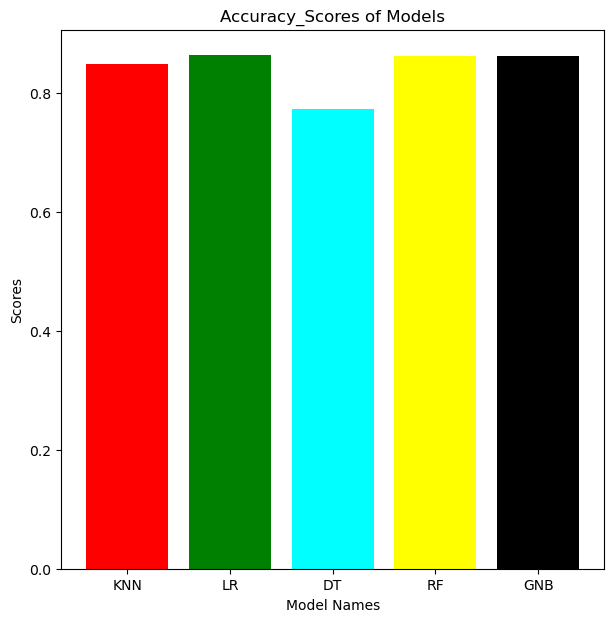

In [31]:
plt.figure(figsize=(7,7))
plt.bar(names,scores,color=['red','green','cyan','yellow','black'])
plt.title("Accuracy_Scores of Models")
plt.xlabel("Model Names")
plt.ylabel("Scores")

In [32]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
names_= []
scores_= []
from sklearn.model_selection import KFold
for name, model in models:
    
    kfold = KFold(n_splits=10) 
    score = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy').mean()
    
    names_.append(name)
    scores_.append(score)
kf_cross_val = pd.DataFrame({'Name': names_, 'Score': scores_})
print(kf_cross_val)

  Name     Score
0  KNN  0.845021
1   LR  0.861365
2   DT  0.771606
3   RF  0.859953
4  GNB  0.859816


Text(0, 0.5, 'Scores')

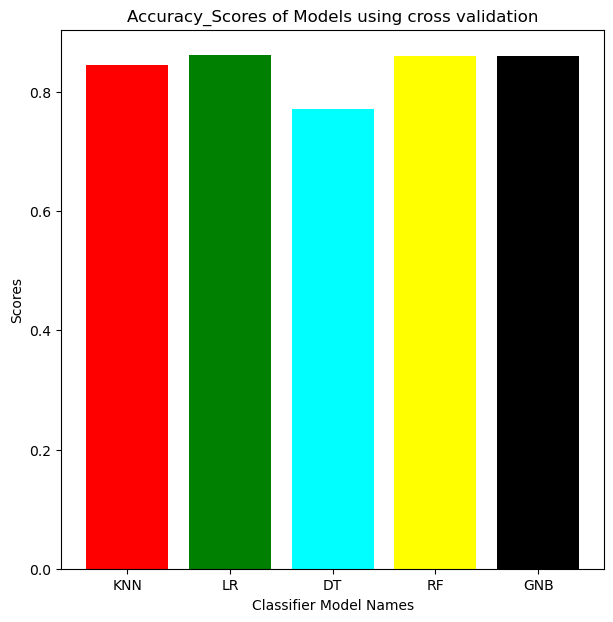

In [33]:
plt.figure(figsize=(7,7))
plt.bar(names_,scores_,color=['red','green','cyan','yellow','black'],data=kf_cross_val)
plt.title("Accuracy_Scores of Models using cross validation")
plt.xlabel("Classifier Model Names")
plt.ylabel("Scores")

In [34]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [35]:
y_pred = log_reg.predict(x_test)

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8634341446721137

In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[39732,   305],
       [ 6080,   637]])

In [80]:
df_test=pd.read_csv("/kaggle/input/can-i-get-promoted/test_data (1).csv")
display(df_test)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,140357,Sales & Marketing,region_31,Master's & above,m,other,2,46,4.0,2,1,0,43
1,131638,Analytics,region_28,Bachelor's,m,other,1,37,5.0,10,1,0,76
2,126519,Operations,region_11,NaN,m,other,1,40,5.0,9,1,0,58
3,61240,Procurement,region_30,Bachelor's,f,other,1,33,5.0,3,1,1,69
4,166530,Analytics,region_2,Bachelor's,m,other,2,30,4.0,3,1,0,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38957,178677,Sales & Marketing,region_2,Bachelor's,m,sourcing,1,23,3.0,4,0,0,43
38958,78279,R&D,region_23,Master's & above,m,sourcing,1,38,3.0,3,0,0,60
38959,7415,Operations,region_2,Bachelor's,f,sourcing,2,31,3.0,3,0,0,59
38960,114605,Technology,region_13,Bachelor's,m,other,2,37,2.0,9,1,0,62


In [81]:
data1 = df.copy()
data1 = data1.drop(['is_promoted'],axis=1)
col = data1.columns
df_test = df_test[col]
df_test.shape

(38962, 12)

In [82]:
df_test.isnull().sum()

department                 0
region                     0
education               1326
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    3270
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [83]:
df_test['education'].value_counts()

Bachelor's          27491
Master's & above     9512
Below Secondary       633
Name: education, dtype: int64

In [84]:
df_test['education'].fillna(df_test['education'].value_counts().index[0],inplace=True)

In [85]:
df_test['previous_year_rating'] = df_test['previous_year_rating'].fillna(df_test['previous_year_rating'].mean())

In [86]:
Label_Encoder = LabelEncoder()
for i in df_test.select_dtypes(include='object').columns:
    df_test[i] = Label_Encoder.fit_transform(df_test[i].astype(str))

In [87]:
df_test.isnull().any()

department              False
region                  False
education               False
gender                  False
recruitment_channel     False
no_of_trainings         False
age                     False
previous_year_rating    False
length_of_service       False
KPIs_met >80%           False
awards_won?             False
avg_training_score      False
dtype: bool

In [88]:
df_test = df_test.to_numpy()
df_test

array([[ 7., 24.,  2., ...,  1.,  0., 43.],
       [ 0., 20.,  0., ...,  1.,  0., 76.],
       [ 4.,  2.,  0., ...,  1.,  0., 58.],
       ...,
       [ 4., 11.,  0., ...,  0.,  0., 59.],
       [ 8.,  4.,  0., ...,  1.,  0., 62.],
       [ 7., 16.,  0., ...,  1.,  0., 49.]])

In [89]:
prom = log_reg.predict(df_test)

In [90]:
out = pd.DataFrame(prom)
out.nunique()

0    1
dtype: int64

In [106]:
out.columns=['is_promoted']
display(out)

,is_promoted
0,1
1,1
2,1
3,1
4,1
...,...
38957,1
38958,1
38959,1
38960,1


In [93]:
xx=pd.read_csv('/kaggle/input/can-i-get-promoted/test_data (1).csv')

In [94]:
display(xx)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,140357,Sales & Marketing,region_31,Master's & above,m,other,2,46,4.0,2,1,0,43
1,131638,Analytics,region_28,Bachelor's,m,other,1,37,5.0,10,1,0,76
2,126519,Operations,region_11,NaN,m,other,1,40,5.0,9,1,0,58
3,61240,Procurement,region_30,Bachelor's,f,other,1,33,5.0,3,1,1,69
4,166530,Analytics,region_2,Bachelor's,m,other,2,30,4.0,3,1,0,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38957,178677,Sales & Marketing,region_2,Bachelor's,m,sourcing,1,23,3.0,4,0,0,43
38958,78279,R&D,region_23,Master's & above,m,sourcing,1,38,3.0,3,0,0,60
38959,7415,Operations,region_2,Bachelor's,f,sourcing,2,31,3.0,3,0,0,59
38960,114605,Technology,region_13,Bachelor's,m,other,2,37,2.0,9,1,0,62


In [101]:
yy=xx['employee_id']
display(yy)
yy.shape

0        140357
1        131638
2        126519
3         61240
4        166530
          ...  
38957    178677
38958     78279
38959      7415
38960    114605
38961    190706
Name: employee_id, Length: 38962, dtype: int64

(38962,)

In [110]:
f1=pd.DataFrame(yy,columns=['employee_id'])
display(f1)

,employee_id
0,140357
1,131638
2,126519
3,61240
4,166530
...,...
38957,178677
38958,78279
38959,7415
38960,114605


In [111]:
display(out)

,is_promoted
0,1
1,1
2,1
3,1
4,1
...,...
38957,1
38958,1
38959,1
38960,1


In [120]:
frames=[f1,out]
result=pd.concat(frames,ignore_index=False,axis=1)

In [121]:
display(result)

,employee_id,is_promoted
0,140357,1
1,131638,1
2,126519,1
3,61240,1
4,166530,1
...,...,...
38957,178677,1
38958,78279,1
38959,7415,1
38960,114605,1


In [ ]:
result.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")